In [35]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [36]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [37]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [38]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [29]:
y_train = y_train.flatten()
y_test = y_test.flatten()

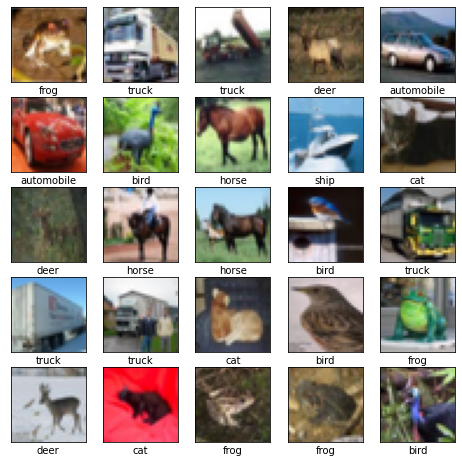

In [40]:
class_names =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [41]:
def Model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), input_shape=x_train.shape[1:], activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(32, (3,3), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(),

        keras.layers.Conv2D(64, (3,3),  activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(),
        keras.layers.Dropout(0.2),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ])

    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [42]:
with tf.device('/GPU:0'):
    model_gpu = Model()
    model_gpu.fit(x_test,y_test,epochs=10)

Epoch 1/10
313/313 [==============================] - 24s 75ms/step - loss: 1.8003 - accuracy: 0.3475
Epoch 2/10
313/313 [==============================] - 28s 90ms/step - loss: 1.4729 - accuracy: 0.4598
Epoch 3/10
313/313 [==============================] - 24s 76ms/step - loss: 1.3005 - accuracy: 0.5288
Epoch 4/10
313/313 [==============================] - 23s 74ms/step - loss: 1.1658 - accuracy: 0.5774
Epoch 5/10
313/313 [==============================] - 24s 76ms/step - loss: 1.0536 - accuracy: 0.6247
Epoch 6/10
313/313 [==============================] - 23s 73ms/step - loss: 0.9626 - accuracy: 0.6591
Epoch 7/10
313/313 [==============================] - 22s 71ms/step - loss: 0.8553 - accuracy: 0.6994
Epoch 8/10
313/313 [==============================] - 23s 72ms/step - loss: 0.7836 - accuracy: 0.7197
Epoch 9/10
313/313 [==============================] - 22s 71ms/step - loss: 0.7131 - accuracy: 0.7469
Epoch 10/10
313/313 [==============================] - 22s 71ms/step - loss: 0.633

In [44]:
model_gpu.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.4690 - accuracy: 0.8395


[0.4689747095108032, 0.8395000100135803]

In [45]:
model_gpu.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

In [53]:
pred = model_gpu.predict(x_test)

In [82]:
Y_pred_classes = np.argmax(pred, axis=1)

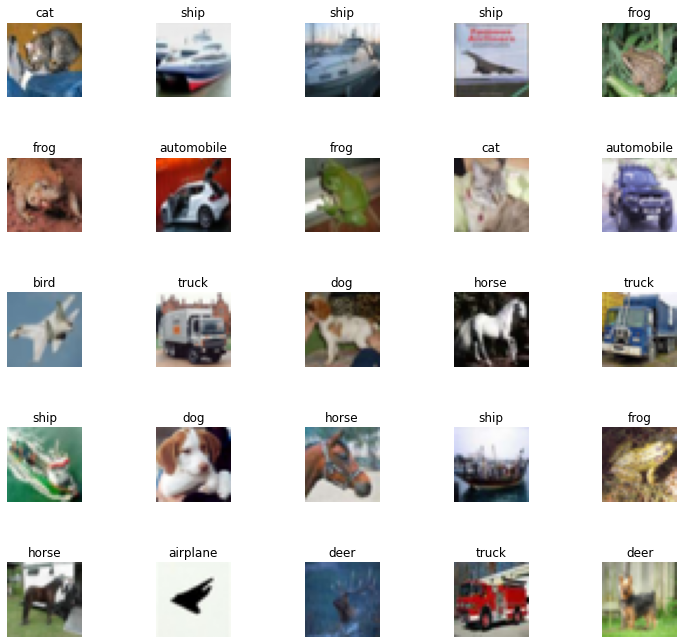

In [83]:
labels =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, 5*5):
    axes[i].imshow(x_test[i])
    axes[i].set_title(labels[Y_pred_classes[i]])
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)